In [49]:
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, linspace, exp, real, imag, abs, angle, conj, meshgrid
from numpy.fft import fft, fftshift
from mpl_toolkits.mplot3d import axes3d

In [3]:
%matplotlib inline

In [4]:
b=.08*1e-3

a=.25*1e-3

k=2*pi/(795*1e-9)

wt=0

C=1

L=1.9

d=.03

In [5]:
def alpha(y):
    return k*a*y/(2*L)

In [6]:
def beta(y):
    return k*b*y/(2*L)

In [79]:
def E(y,kt):
    """The double slit pattern, at a specific angle given by the kt transverse wavenumber"""
    return exp(1j*kt*y) * b*C*(sin(beta(y)) / beta(y)) * (sin(wt-k*L) + sin(wt-k*L+2*alpha(y)))

# note, we needed to add an angled phase front with transverse wavenumber kt

In [80]:
kt = k*d/L

From Hecht (4th ed) pg 459

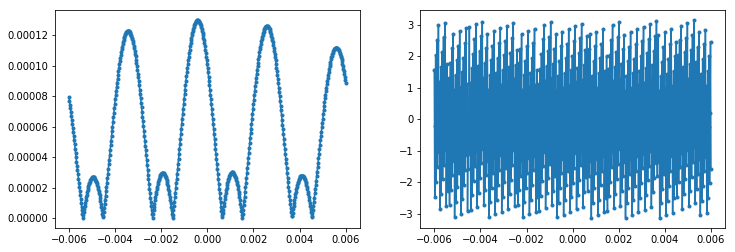

In [87]:
y = linspace(-.006,.006,600)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(y,abs(E(y,kt)),".-")
plt.subplot(122)
plt.plot(y,angle(E(y,kt)),".-")

## Zernike Local Oscillator: 

In [88]:
Z_1=1

In [89]:
def Z_2(x):
    return 2*x
def Z_3(y):
    return 2*y

In [90]:
def Z_4(x,y):
    return (6**.5)*2*x*y

In [91]:
def Z_5(x,y):
    return (3**.5)*(2*x**2+2*y**2-1) 
def Z_6(x,y):
    return (6**.5)*(x**2 - y**2)

In [92]:
def Z_7(x,y):
    return (8**.5)*(3*x**2*y-y**3)
def Z_8(x,y):
    return (8**.5)*(3*x**2*y-y+3*y**3-2*y)

In [93]:
def Z_9(x,y):
    return (8**.5)*(3*x**3+3*x*y**2-2*x)
def Z_10(x,y):
    return (8**.5)*(x**3-3*x*y**2)

In [94]:
def Psi(x,y,w,Cn=[.12,.08,.018,0.039,-.275,.031,.00,.00,0.003,-.027]):
    Zsum = Cn[0]*Z_1 + Cn[1]*Z_2(x) + Cn[2]*Z_3(y) + Cn[3]*Z_4(x,y) + Cn[4]*Z_5(x,y) 
    Zsum += Cn[5]*Z_6(x,y) + Cn[6]*Z_7(x,y) + Cn[7]*Z_8(x,y) + Cn[8]*Z_9(x,y) + Cn[9]*Z_10(x,y)
    return exp(-(x**2 + y**2)/ w**2)* exp(1j*2*pi*Zsum)

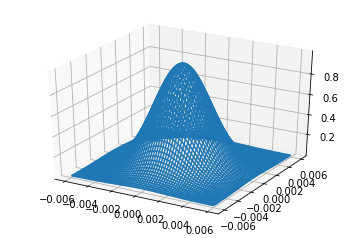

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=linspace(-.006,.006,600)
y=linspace(-.006,.006,600)
X, Y = meshgrid(x,y)
Z=Psi(X,Y,w=.003,Cn=[.158,-.025,.025,-.007,-.143,-.008,-.006,.007,.01,-.011])
ax.plot_wireframe(X, Y, abs(Z), rstride=10, cstride=10)

In [96]:
# use a small amplitude to match the size of E(y)

LObeam = 0.001 * Z[:,300]

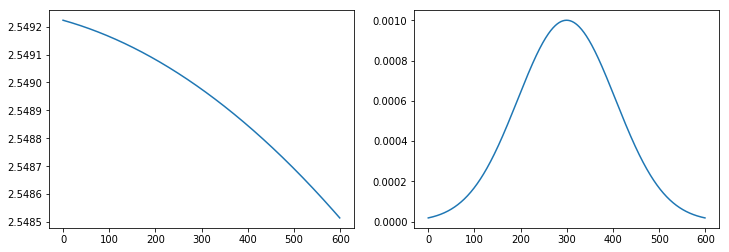

In [112]:
# Plot phase and amplitude of the Zernike beam:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(angle(LObeam))
plt.subplot(122)
plt.plot(abs(LObeam))

## The phase front is slightly curved, but note the y-scale. It is effectively a plane wave.

In [99]:
TotalIntensity=(E(y,kt)+LObeam) * (E(y,kt)+LObeam).conj()

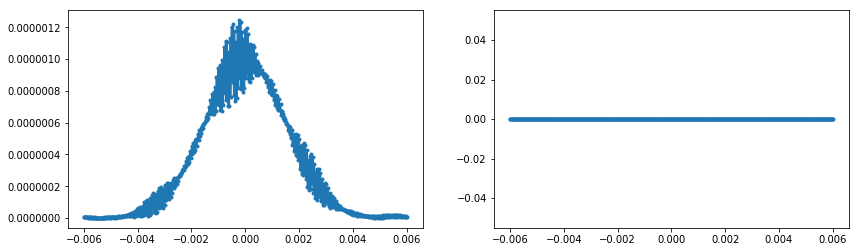

In [107]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(y,abs(TotalIntensity),".-")
plt.subplot(122)
plt.plot(y,angle(TotalIntensity),".-")  # this should be zero based on how we calculate the total intensity

#plt.xlim([-.002,0])

(150, 250)

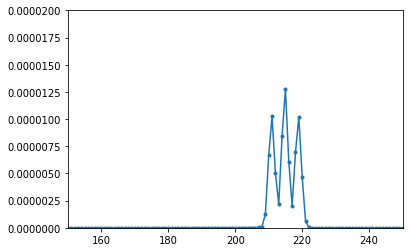

In [108]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.00002]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([150,250])

This looks decent... at least it agrees with what we've seen in other models. Next: start plugging in data from other beam measurements